# 0. Import Library

In [1]:
import pandas as pd
import numpy as np

# 한글폰트 설정, 그래프 마이너스 표시 설정
import matplotlib
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
from tqdm import tqdm
import platform
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# # 한글깨짐 해결
# import matplotlib as mpl
# import matplotlib.pylab as plt

# plt.rcParams["font.family"] = "MAlgun Gothic"
# plt.rcParams["font.size"] = 12
# plt.rcParams["figure.figsize"] = (14,4)

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# 1. Load Data

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
age_gender_info = pd.read_csv('./age_gender_info.csv')

In [3]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [5]:
age_gender_info.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [6]:
train.info()
# 임대보증금, 임대료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [7]:
train.shape

(2952, 15)

In [8]:
test.info()
# 임대보증금, 임대료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [9]:
train.head(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [12]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [10]:
# train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
# test.loc[test.임대보증금=='-', '임대보증금'] = np.nan

# train['임대보증금'] = train['임대보증금'].astype(float)
# test['임대보증금'] = test['임대보증금'].astype(float)

In [11]:
# test['임대보증금'].mean()

# Preprocessing

nan으로 만들고 끝나면 안 되고, 0으로 바꾼 뒤에 처리

In [12]:
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

train['임대보증금'] = train['임대보증금'].astype(float)/1000
test['임대보증금'] = test['임대보증금'].astype(float)/1000
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [13]:
#train.describe()

In [13]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
공공분양      7
Name: 공급유형, dtype: int64

In [14]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    177
영구임대      3
Name: 공급유형, dtype: int64

In [16]:
train.공급유형.unique()

array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
       '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object)

In [17]:
train[train.임대보증금.isnull()].자격유형.value_counts()

Series([], Name: 자격유형, dtype: int64)

In [18]:
test[test.임대보증금.isnull()].자격유형.value_counts()

Series([], Name: 자격유형, dtype: int64)

In [19]:
train.자격유형.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [20]:
train.지역.unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [21]:
train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

In [22]:
test.isna()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1018,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1019,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830.0,189840.0,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048.0,249930.0,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048.0,249930.0,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048.0,249930.0,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497.0,296780.0,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,0.0,0.0,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410.0,144600.0,0.0,2.0,300.0


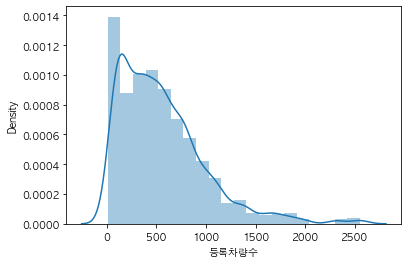

In [24]:
sns.distplot(train['등록차량수'],bins=20);
# positive skewness

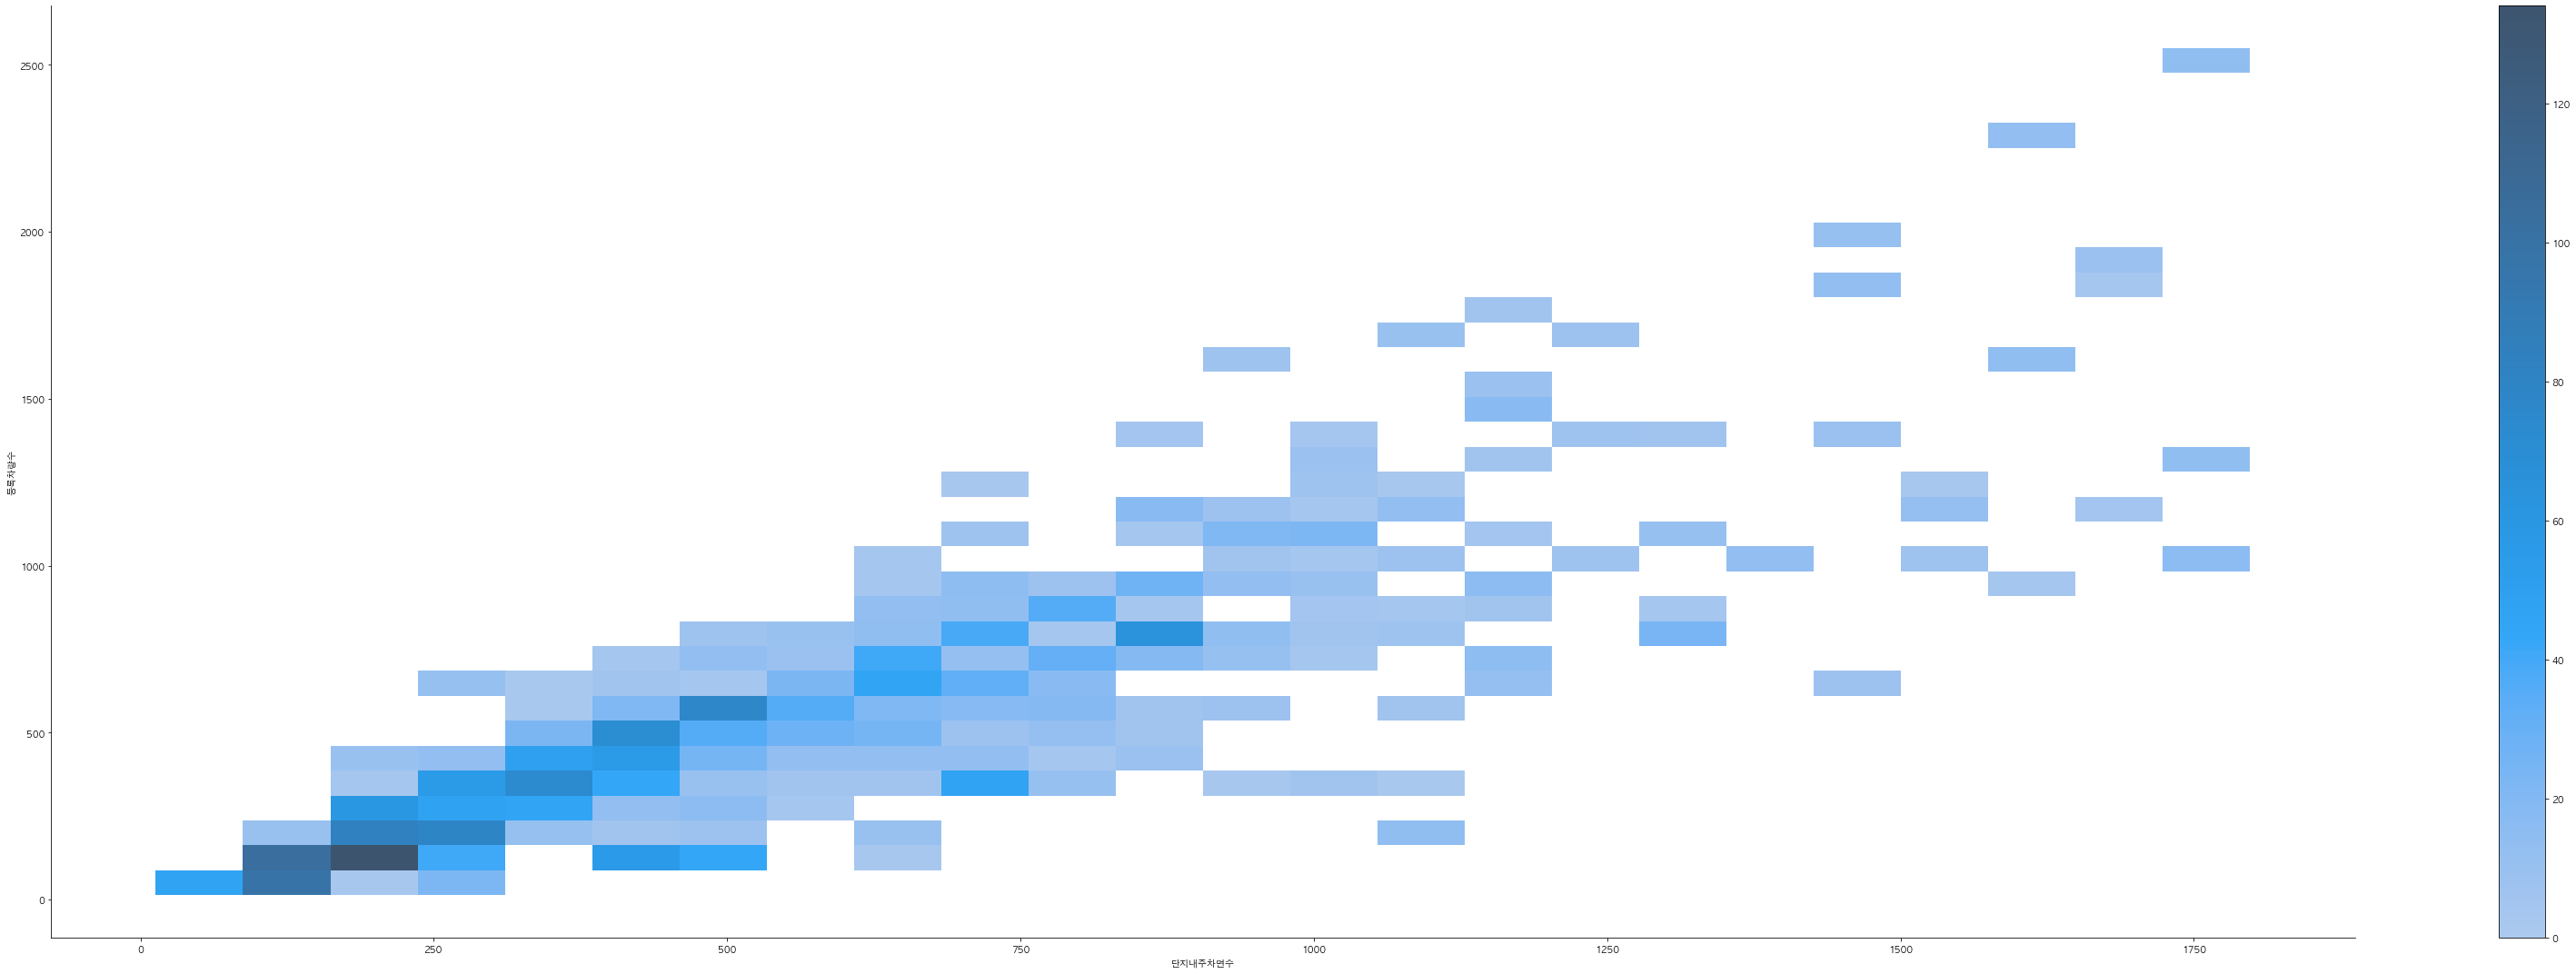

In [25]:
#plt.figure(figsize=(30,10)) 
sns.displot(train, x="단지내주차면수", y="등록차량수", height = 15, aspect = 3, cbar=True)

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

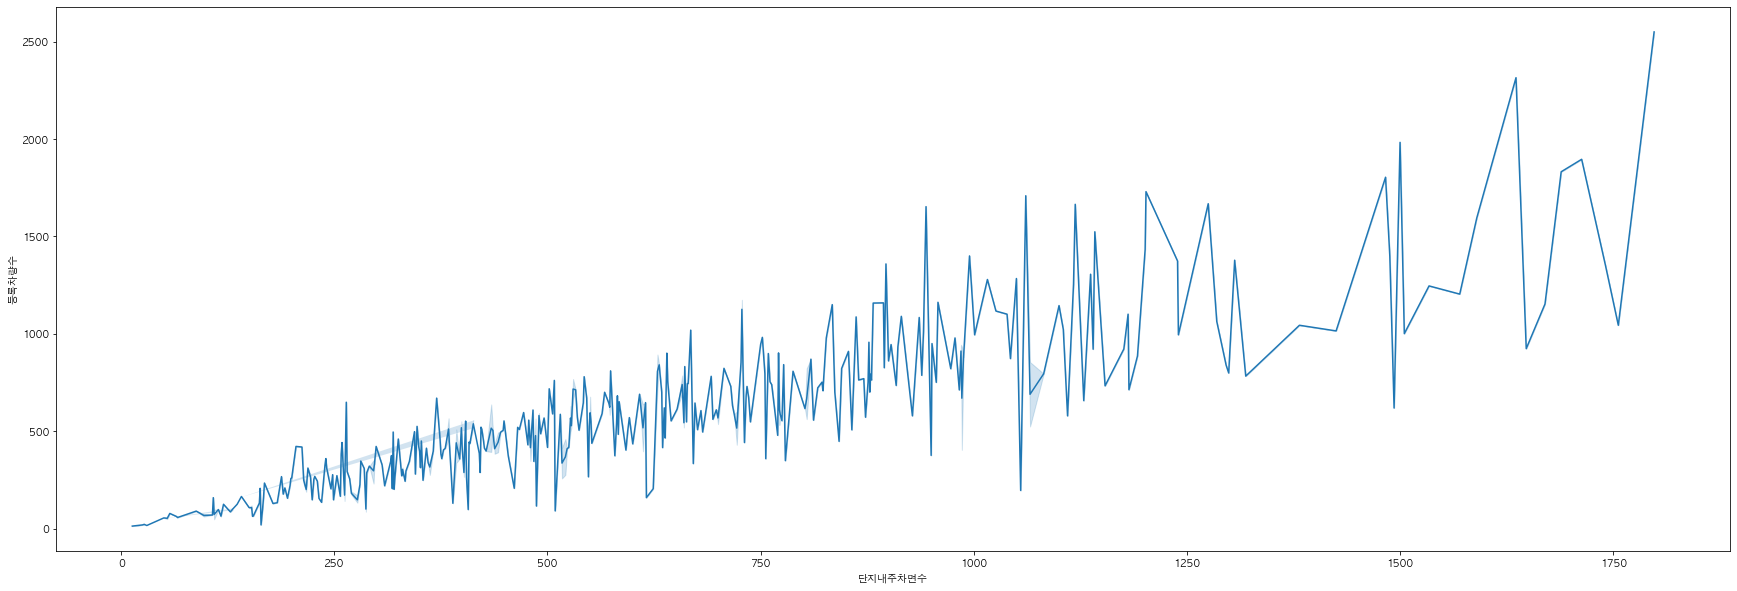

In [26]:
plt.figure(figsize=(30,10)) 
sns.lineplot(data=train, x="단지내주차면수", y="등록차량수")

### correlation matrix

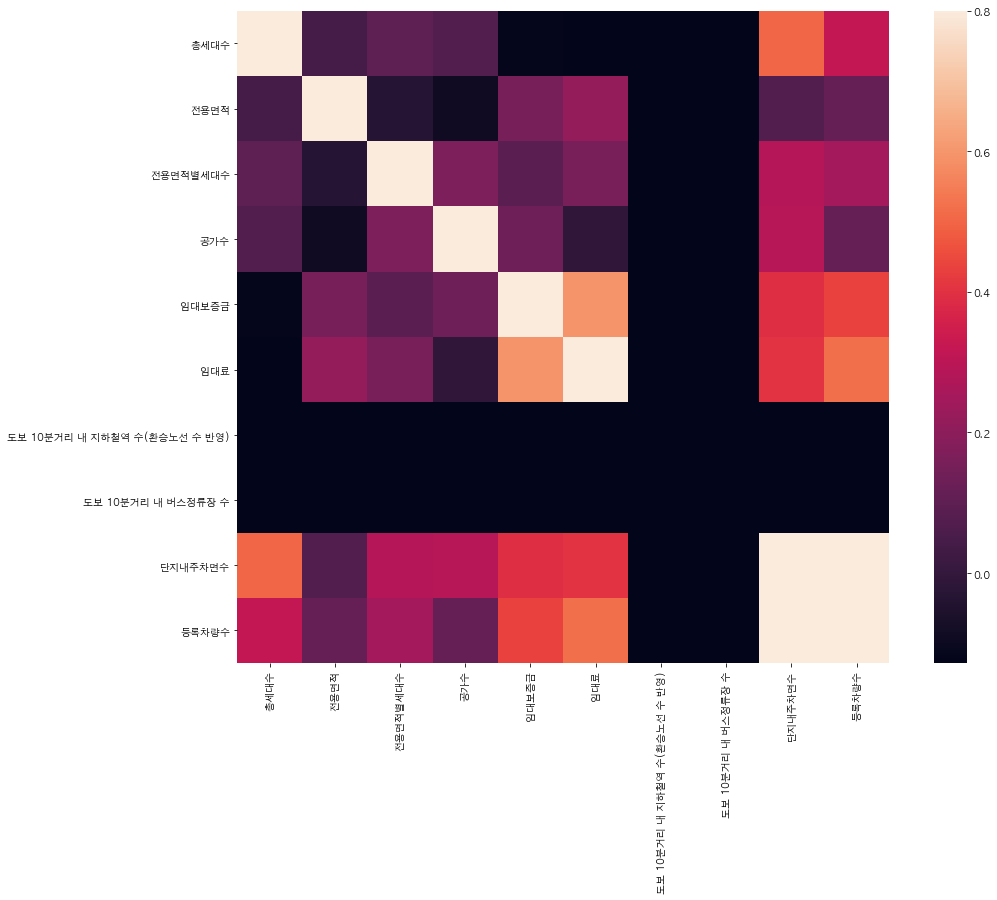

In [27]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

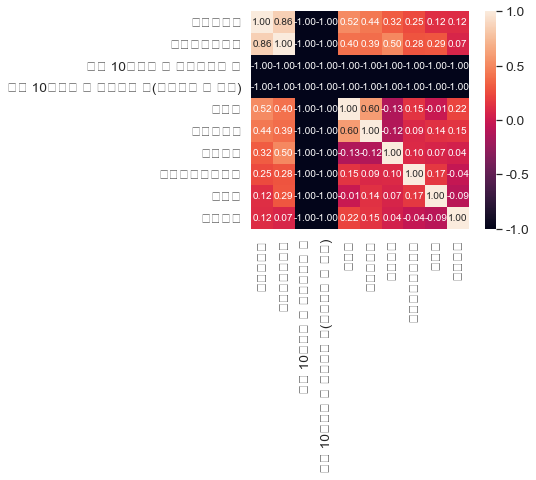

In [28]:
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, '등록차량수')['등록차량수'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [29]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

# sns.set()
# cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']
# sns.pairplot(train[cols], size = 2.5)
# plt.show();

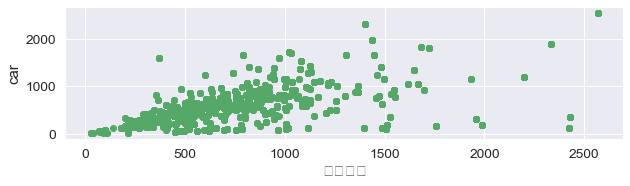

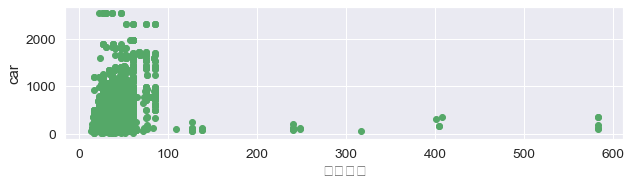

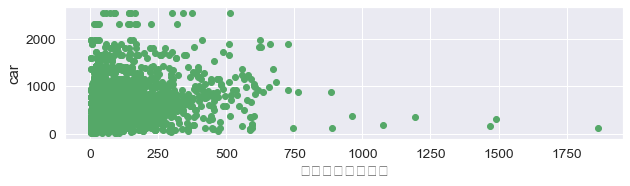

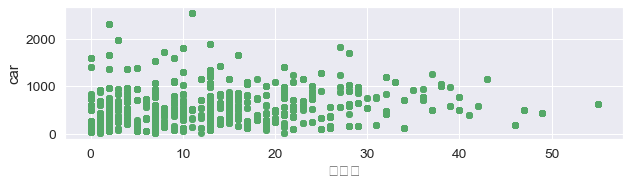

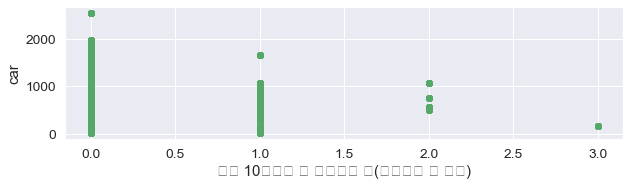

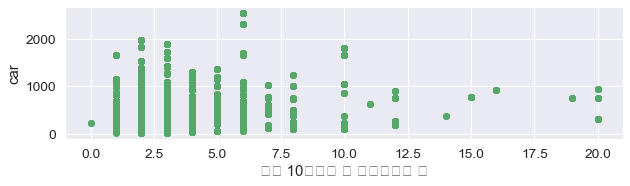

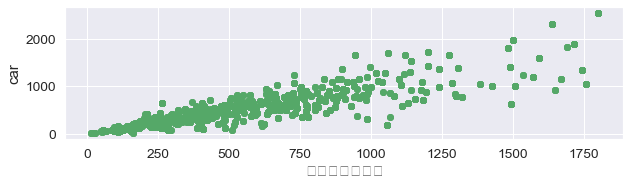

In [30]:
cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']

i = 711
for c in cols[:-1]:
    plt.figure(figsize=(10,20))
    plt.subplot(i)
    plt.scatter(train[c], train['등록차량수'], c='g')
    plt.xlabel(c)
    plt.ylabel('car')
    plt.grid(True)
    plt.show()
    i += 1

# plt.subplot(212)
# plt.scatter(train['총세대수'], train['등록차량수'], c='g')
# plt.xlabel('num')
# plt.ylabel('car')
# plt.grid(True)
# plt.show()

In [31]:
idx = train[train['전용면적']>100].index
train.loc[idx,'전용면적'] = 100

머신러닝할 때, 입력 데이터에 가중치를 주는 방법??

In [32]:
train.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667.0,103680.0,0.0,3.0,1425.0,1015.0


In [33]:
def change_col_name(df,mode='train'):
    if mode == 'train':
        df.columns = ['code', 'numHouse', 'building','region','supplyType','area','housePerArea',
                      'empty','licenseType','guarantee','fee','subway','bus','parkingArea','label']
    else:
        df.columns = ['code', 'numHouse', 'building','region','supplyType','area','housePerArea',
                      'empty','licenseType','guarantee','fee','subway','bus','parkingArea']

In [34]:
change_col_name(train)
change_col_name(test, 'test')

In [35]:
train

,code,numHouse,building,region,supplyType,area,housePerArea,empty,licenseType,guarantee,fee,subway,bus,parkingArea,label
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346.0,116090.0,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005.0,142310.0,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005.0,142310.0,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005.0,142310.0,0.0,1.0,166.0,146.0


In [36]:
test

,code,numHouse,building,region,supplyType,area,housePerArea,empty,licenseType,guarantee,fee,subway,bus,parkingArea
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830.0,189840.0,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048.0,249930.0,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048.0,249930.0,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048.0,249930.0,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497.0,296780.0,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,0.0,0.0,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872.0,106400.0,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872.0,106400.0,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410.0,144600.0,0.0,2.0,300.0


In [37]:
test['guarantee'] = test['guarantee'].fillna(0)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          1022 non-null   object 
 1   numHouse      1022 non-null   int64  
 2   building      1022 non-null   object 
 3   region        1022 non-null   object 
 4   supplyType    1022 non-null   object 
 5   area          1022 non-null   float64
 6   housePerArea  1022 non-null   int64  
 7   empty         1022 non-null   float64
 8   licenseType   1020 non-null   object 
 9   guarantee     1022 non-null   float64
 10  fee           1022 non-null   float64
 11  subway        1022 non-null   float64
 12  bus           1022 non-null   float64
 13  parkingArea   1022 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 111.9+ KB


In [39]:
local_map = {}
for i, loc in enumerate(train['region'].unique()):
    local_map[loc] = i

train['region'] = train['region'].map(local_map)
test['region'] = test['region'].map(local_map)

In [40]:
building_map = {}
for i, loc in enumerate(train['building'].unique()):
    building_map[loc] = i
train['building'] = train['building'].map(building_map)
test['building'] = test['building'].map(building_map)

In [41]:
supplyType_map = {}
for i, loc in enumerate(train['supplyType'].unique()):
    supplyType_map[loc] = i
train['supplyType'] = train['supplyType'].map(supplyType_map)
test['supplyType'] = test['supplyType'].map(supplyType_map)

In [42]:
licenseType_map = {}
for i, loc in enumerate(train['licenseType'].unique()):
    licenseType_map[loc] = i
train['licenseType'] = train['licenseType'].map(licenseType_map)
test['licenseType'] = test['licenseType'].map(licenseType_map)

In [43]:
def get_minmax(df, df_test, categoric_list):
    minmax={}
    for col in categoric_list:
        
        train = df[col]
        if col == 'label': 
            minmax[col]=[ np.min(train), np.max(train), np.mean(train)]
            continue
                
        test = df_test[col]
        minmax[col]=[np.min((np.min(test), np.min(train))), np.max((np.max(test), np.max(train))), np.mean(train)]

    return minmax

def numeric_process(df, df_test, categoric_list):
    minmax = get_minmax(df, df_test, categoric_list)
    for col in minmax:
        print(col, minmax[col])
        train = df[col]
        train = train.fillna(minmax[col][2])
        train = (train-minmax[col][0]) / (minmax[col][1]-minmax[col][0])
        df[col]=train
        
        if col=='label': continue
        test = df_test[col]
        test = test.fillna(minmax[col][2])
        test = (test-minmax[col][0]) / (minmax[col][1]-minmax[col][0])
        df_test[col]=test
        
    return df, df_test

In [44]:
numeric_list = ['numHouse', 'building','region','supplyType','area','housePerArea',
                'empty','licenseType','guarantee','fee','subway','bus','parkingArea']
numeric_process(train,test,numeric_list)

numHouse [26, 2572, 886.6612466124661]
building [0, 1, 0.19037940379403795]
region [0, 15, 5.563008130081301]
supplyType [0, 9, 1.6039972899728998]
area [9.96, 583.4, 42.96734417344173]
housePerArea [1, 1865, 102.7479674796748]
empty [0.0, 55.0, 12.921070460704607]
licenseType [0.0, 14.0, 1.950880758807588]
guarantee [0.0, 216423.0, 21576.998035230354]
fee [0.0, 1058030.0, 156600.98577235773]
subway [0.0, 3.0, nan]
bus [0.0, 50.0, nan]
parkingArea [13.0, 1798.0, 601.6683604336043]


(       code  numHouse  building    region  supplyType      area  housePerArea  \
 0     C2483  0.343284       0.0  0.000000         0.0  0.051897      0.071352   
 1     C2483  0.343284       0.0  0.000000         0.0  0.051897      0.007511   
 2     C2483  0.343284       0.0  0.000000         0.0  0.073190      0.206009   
 3     C2483  0.343284       0.0  0.000000         0.0  0.073190      0.007511   
 4     C2483  0.343284       0.0  0.000000         0.0  0.073190      0.021459   
 ...     ...       ...       ...       ...         ...       ...           ...   
 2947  C2532  0.083661       0.0  0.333333         0.0  0.068429      0.009657   
 2948  C2532  0.083661       0.0  0.333333         0.0  0.071708      0.017704   
 2949  C2532  0.083661       0.0  0.333333         0.0  0.072841      0.017704   
 2950  C2532  0.083661       0.0  0.333333         0.0  0.073242      0.060622   
 2951  C2532  0.083661       0.0  0.333333         0.0  0.078456      0.009657   
 
          empt

In [45]:
train

,code,numHouse,building,region,supplyType,area,housePerArea,empty,licenseType,guarantee,fee,subway,bus,parkingArea,label
0,C2483,0.343284,0.0,0.000000,0.0,0.051897,0.071352,0.690909,0.0,0.072391,0.097993,0.0,0.06,0.791036,1015.0
1,C2483,0.343284,0.0,0.000000,0.0,0.051897,0.007511,0.690909,0.0,0.072391,0.097993,0.0,0.06,0.791036,1015.0
2,C2483,0.343284,0.0,0.000000,0.0,0.073190,0.206009,0.690909,0.0,0.126160,0.174220,0.0,0.06,0.791036,1015.0
3,C2483,0.343284,0.0,0.000000,0.0,0.073190,0.007511,0.690909,0.0,0.126160,0.174220,0.0,0.06,0.791036,1015.0
4,C2483,0.343284,0.0,0.000000,0.0,0.073190,0.021459,0.690909,0.0,0.126160,0.174220,0.0,0.06,0.791036,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,0.083661,0.0,0.333333,0.0,0.068429,0.009657,0.127273,0.0,0.052425,0.109723,0.0,0.02,0.085714,146.0
2948,C2532,0.083661,0.0,0.333333,0.0,0.071708,0.017704,0.127273,0.0,0.064711,0.134505,0.0,0.02,0.085714,146.0
2949,C2532,0.083661,0.0,0.333333,0.0,0.072841,0.017704,0.127273,0.0,0.064711,0.134505,0.0,0.02,0.085714,146.0
2950,C2532,0.083661,0.0,0.333333,0.0,0.073242,0.060622,0.127273,0.0,0.064711,0.134505,0.0,0.02,0.085714,146.0


In [46]:
test

,code,numHouse,building,region,supplyType,area,housePerArea,empty,licenseType,guarantee,fee,subway,bus,parkingArea
0,C1072,0.285939,0.0,0.200000,0.000000,0.052019,0.061695,0.254545,0.500000,0.105488,0.179428,0.0,0.04,0.375350
1,C1072,0.285939,0.0,0.200000,0.000000,0.064261,0.015558,0.254545,0.000000,0.166563,0.236222,0.0,0.04,0.375350
2,C1072,0.285939,0.0,0.200000,0.000000,0.064418,0.059549,0.254545,0.500000,0.166563,0.236222,0.0,0.04,0.375350
3,C1072,0.285939,0.0,0.200000,0.000000,0.064418,0.063841,0.254545,0.500000,0.166563,0.236222,0.0,0.04,0.375350
4,C1072,0.285939,0.0,0.200000,0.000000,0.072370,0.031652,0.254545,0.500000,0.200981,0.280502,0.0,0.04,0.375350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,0.254910,0.0,0.066667,0.888889,0.046753,0.067060,0.690909,0.785714,0.000000,0.000000,0.0,0.02,0.254342
1018,C2189,0.139827,0.0,0.266667,0.000000,0.033534,0.050966,0.818182,0.500000,0.031753,0.100564,0.0,0.04,0.160784
1019,C2189,0.139827,0.0,0.266667,0.000000,0.033534,0.010193,0.818182,0.500000,0.031753,0.100564,0.0,0.04,0.160784
1020,C2189,0.139827,0.0,0.266667,0.000000,0.051426,0.107833,0.818182,0.500000,0.061962,0.136669,0.0,0.04,0.160784


In [47]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [48]:
numeric_list_train = ['numHouse', 'building','region','supplyType','area','housePerArea',
                'empty','licenseType','guarantee','fee','subway','bus','parkingArea','label']

In [49]:
def mergePerCodeNum(train,df_train):
    for i, code in tqdm(enumerate(train['code'].unique())):
        temp = train[train['code']==code]
        col_list = numeric_list
        if len(train.columns)==15:
            col_list = numeric_list_train
        temp.index = range(temp.shape[0])
        for col in col_list:
            df_train.loc[i, col] = temp[col].sum()/len(temp)

In [50]:
mergePerCodeNum(train, df_train)

423it [00:00, 706.52it/s]


In [51]:
mergePerCodeNum(test, df_test)

150it [00:00, 811.67it/s]


In [52]:
len(train.columns)

15

In [53]:
df_train

,numHouse,building,region,supplyType,area,housePerArea,empty,licenseType,guarantee,fee,subway,bus,parkingArea,label
0,0.343284,0.0,0.000000,0.000000,0.069608,0.059818,0.690909,0.000000,0.114481,0.158701,0.000000,0.06,0.791036,1015.0
1,0.203849,0.0,0.066667,0.000000,0.059964,0.041232,0.309091,0.000000,0.077566,0.131903,0.000000,0.06,0.342297,205.0
2,0.467400,0.0,0.133333,0.000000,0.054572,0.058769,0.236364,0.000000,0.131735,0.167037,0.333333,0.02,0.712605,1064.0
3,0.286332,0.0,0.200000,0.000000,0.070714,0.066971,0.109091,0.071429,0.104664,0.178735,0.333333,0.06,0.403922,730.0
4,0.263158,0.0,0.266667,0.000000,0.057587,0.092811,0.254545,0.000000,0.081889,0.113560,0.000000,0.04,0.354062,553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.025137,0.0,0.600000,0.888889,0.029046,0.009120,0.127273,0.642857,0.120874,0.105082,0.000000,0.06,0.029692,57.0
419,0.183032,0.0,0.333333,0.000000,0.045672,0.052253,0.436364,0.000000,0.072682,0.150090,0.000000,0.02,0.284594,246.0
420,0.005499,0.0,0.533333,0.888889,0.029047,0.006617,0.127273,0.785714,0.129992,0.128519,0.333333,0.04,0.006723,19.0
421,0.025137,0.0,0.733333,0.222222,0.025931,0.047747,0.218182,0.142857,0.047805,0.101632,0.000000,0.02,0.009524,16.0


In [54]:
label = df_train['label']
label

0      1015.0
1       205.0
2      1064.0
3       730.0
4       553.0
        ...  
418      57.0
419     246.0
420      19.0
421      16.0
422     146.0
Name: label, Length: 423, dtype: float64

In [55]:
## Checking temp info
# for i, code in tqdm(enumerate(train['code'].unique())):
#     print(code)
#     temp = train[train['code']==code]
#     print(f"temp: {temp}")
#     temp.index = range(temp.shape[0])

In [56]:
# train = train.drop('code', axis=1)
# test = test.drop('code', axis=1)

In [57]:
df_train = df_train.drop('label',axis=1)

# Convert Pandas to Numpy

In [58]:
break here!!!!!

SyntaxError: invalid syntax (<ipython-input-58-2e98572a29d3>, line 1)

In [59]:
np_train = df_train.to_numpy(copy=True)
np_test = df_test.to_numpy(copy=True)
np_label = label.to_numpy(copy=True)

In [62]:
np_train.dtype

dtype('float64')

In [63]:
np_train.shape

(423, 13)

In [ ]:
np_label

In [ ]:
np_label.shape

In [64]:
np_test

array([[0.28593873, 0.        , 0.2       , ..., 0.        , 0.04      ,
        0.37535014],
       [0.52160251, 0.        , 0.2       , ..., 0.        , 0.06      ,
        0.67394958],
       [0.23291438, 0.        , 0.53333333, ..., 0.        , 0.32      ,
        0.29915966],
       ...,
       [0.03692066, 0.        , 0.33333333, ..., 0.        , 0.02      ,
        0.01512605],
       [0.25490966, 0.        , 0.06666667, ..., 0.        , 0.02      ,
        0.25434174],
       [0.13982718, 0.        , 0.26666667, ..., 0.        , 0.04      ,
        0.16078431]])

In [ ]:
test[:10]

In [65]:
np_train.shape[1]

13

In [ ]:
test.shape[1:]

In [ ]:
np_train.shape

In [ ]:
np_train

In [ ]:
test.shape

In [ ]:
X_val.shape

In [ ]:
np_label.shape

In [ ]:
# # # Conv layer input
# df_train = df_train.reshape((423,13,1))
# df_test = df_test.reshape((150,13,1))

In [ ]:
break here

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation,Convolution1D,MaxPool1D,BatchNormalization,Flatten,Dense,Dropout

### 왜 모든 값이 하나로 통일 되어서 나오는가

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np_train, np_label, test_size=0.2, random_state=1)

In [78]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(100, kernel_initializer='normal',input_dim = np_train.shape[1], activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [79]:
NN_model.fit(np_train, np_label, epochs=300, batch_size=32, validation_split = 0.2)

Epoch 1/300
11/11 [==============================] - 0s 8ms/step - loss: 542.0702 - mean_absolute_error: 542.0702 - val_loss: 626.9371 - val_mean_absolute_error: 626.9371
Epoch 2/300
11/11 [==============================] - 0s 2ms/step - loss: 556.2354 - mean_absolute_error: 556.2354 - val_loss: 626.8271 - val_mean_absolute_error: 626.8271
Epoch 3/300
11/11 [==============================] - 0s 2ms/step - loss: 567.8701 - mean_absolute_error: 567.8701 - val_loss: 626.7171 - val_mean_absolute_error: 626.7171
Epoch 4/300
11/11 [==============================] - 0s 2ms/step - loss: 565.0267 - mean_absolute_error: 565.0267 - val_loss: 626.6071 - val_mean_absolute_error: 626.6071
Epoch 5/300
11/11 [==============================] - 0s 2ms/step - loss: 573.4245 - mean_absolute_error: 573.4245 - val_loss: 626.4970 - val_mean_absolute_error: 626.4970
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 594.7345 - mean_absolute_error: 594.7345 - val_loss: 626.3870 - val_mean

Epoch 49/300
11/11 [==============================] - 0s 2ms/step - loss: 550.3093 - mean_absolute_error: 550.3093 - val_loss: 621.6570 - val_mean_absolute_error: 621.6570
Epoch 50/300
11/11 [==============================] - 0s 2ms/step - loss: 550.6608 - mean_absolute_error: 550.6608 - val_loss: 621.5471 - val_mean_absolute_error: 621.5471
Epoch 51/300
11/11 [==============================] - 0s 2ms/step - loss: 555.0012 - mean_absolute_error: 555.0012 - val_loss: 621.4370 - val_mean_absolute_error: 621.4370
Epoch 52/300
11/11 [==============================] - 0s 2ms/step - loss: 550.1239 - mean_absolute_error: 550.1239 - val_loss: 621.3270 - val_mean_absolute_error: 621.3270
Epoch 53/300
11/11 [==============================] - 0s 2ms/step - loss: 550.6708 - mean_absolute_error: 550.6708 - val_loss: 621.2170 - val_mean_absolute_error: 621.2170
Epoch 54/300
11/11 [==============================] - 0s 2ms/step - loss: 574.8942 - mean_absolute_error: 574.8942 - val_loss: 621.1070 - va

11/11 [==============================] - 0s 2ms/step - loss: 531.4561 - mean_absolute_error: 531.4561 - val_loss: 611.3810 - val_mean_absolute_error: 611.3810
Epoch 144/300
11/11 [==============================] - 0s 2ms/step - loss: 522.7381 - mean_absolute_error: 522.7381 - val_loss: 611.2737 - val_mean_absolute_error: 611.2737
Epoch 145/300
11/11 [==============================] - 0s 2ms/step - loss: 552.6446 - mean_absolute_error: 552.6446 - val_loss: 611.1662 - val_mean_absolute_error: 611.1662
Epoch 146/300
11/11 [==============================] - 0s 2ms/step - loss: 560.7607 - mean_absolute_error: 560.7607 - val_loss: 611.0602 - val_mean_absolute_error: 611.0602
Epoch 147/300
11/11 [==============================] - 0s 2ms/step - loss: 524.7810 - mean_absolute_error: 524.7810 - val_loss: 610.9554 - val_mean_absolute_error: 610.9554
Epoch 148/300
11/11 [==============================] - 0s 2ms/step - loss: 542.5092 - mean_absolute_error: 542.5092 - val_loss: 610.8506 - val_mean_a

11/11 [==============================] - 0s 2ms/step - loss: 504.7532 - mean_absolute_error: 504.7532 - val_loss: 601.7484 - val_mean_absolute_error: 601.7484
Epoch 238/300
11/11 [==============================] - 0s 2ms/step - loss: 530.8818 - mean_absolute_error: 530.8818 - val_loss: 601.6473 - val_mean_absolute_error: 601.6473
Epoch 239/300
11/11 [==============================] - 0s 2ms/step - loss: 537.1106 - mean_absolute_error: 537.1106 - val_loss: 601.5462 - val_mean_absolute_error: 601.5462
Epoch 240/300
11/11 [==============================] - 0s 2ms/step - loss: 512.0178 - mean_absolute_error: 512.0178 - val_loss: 601.4452 - val_mean_absolute_error: 601.4452
Epoch 241/300
11/11 [==============================] - 0s 2ms/step - loss: 514.4389 - mean_absolute_error: 514.4389 - val_loss: 601.3441 - val_mean_absolute_error: 601.3441
Epoch 242/300
11/11 [==============================] - 0s 2ms/step - loss: 522.4766 - mean_absolute_error: 522.4766 - val_loss: 601.2430 - val_mean_a

# 계속 같은 값이 나와요...ㅠㅠㅠㅠㅠㅠㅠㅠ

In [80]:
NN_model.predict(np_train)

array([[32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],
       [32.839672],


In [73]:
len(NN_model.predict(np_train))

423

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from tqdm import tqdm

xgb_model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

#train_test_split + ndarray 변환 다 한 것
history = xgb_model.fit(X_train,y_train)

In [ ]:
xgb_model.predict(df_test)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = xgb_model.predict(X_train)
print(f'Train Accuracy: {mean_squared_error(y_train,y_pred):.2f}')

In [ ]:
pred = xgb_model.predict(df_test)

In [ ]:
len(df_test)

In [ ]:
len(pred)

In [ ]:
pred

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['num'] = pred
submission.to_csv('sub4.csv', index=False)

# Why not working?

In [ ]:
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

X_train = np.array(x).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape)
print(X_train.shape[1:])

print(y_train.shape)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=13))
model.add(Dense(1))

# model.summary()

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습 및 예측
model.fit(np_train, np_label, batch_size=1, epochs=100, verbose=1)

In [ ]:
pred_exam = model.predict(X_train)
print(len(pred_exam))

In [ ]:
print(pred_exam[0])